<a href="https://colab.research.google.com/github/aalr007/MAAM/blob/main/A3a_DL_TC3007B_embeddings_hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/aalr007/MAAM/blob/main/A3a_DL_TC3007B_embeddings_hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> ***Métodos Avanzados de Aprendizaje Máquina*** </center>
## <center> ***Equipo 38*** </center>
## <center> ***Activity 3a*** </center>
### Profesor: Dr José Antonio Cantoral Cevallos
### Alumnos:
* Luis Alfredo Negron Naldos A01793865
* Javier Muñoz Barrios A01794423
* Aurelio Antonio Lozano Rábago A01081266

#### <p style='text-align: right;'> Noviembre del 2023 </p>

## TC 5033
### Word Embeddings

<br>

#### Activity 3a: Exploring Word Embeddings with GloVe and Numpy
<br>

- Objective:
    - To understand the concept of word embeddings and their significance in Natural Language Processing.
    - To learn how to manipulate and visualize high-dimensional data using dimensionality reduction techniques like PCA and t-SNE.
    - To gain hands-on experience in implementing word similarity and analogies using GloVe embeddings and Numpy.
    
<br>

- Instructions:
    - Download GloVe pre-trained vectors from the provided link in Canvas, the official public project:
    Jeffrey Pennington, Richard Socher, and Christopher D. Manning. 2014. GloVe: Global Vectors for Word Representation
    https://nlp.stanford.edu/data/glove.6B.zip

    - Create a dictorionay of the embeddings so that you carry out fast look ups. Save that dictionary e.g. as a serialized file for faster loading in future uses.
    
    - PCA and t-SNE Visualization: After loading the GloVe embeddings, use Numpy and Sklearn to perform PCA and t-SNE to reduce the dimensionality of the embeddings and visualize them in a 2D or 3D space.

    - Word Similarity: Implement a function that takes a word as input and returns the 'n' most similar words based on their embeddings. You should use Numpy to implement this function, using libraries that already implement this function (e.g. Gensim) will result in zero points.

    - Word Analogies: Implement a function to solve analogies between words. For example, "man is to king as woman is to ____". You should use Numpy to implement this function, using libraries that already implement this function (e.g. Gensim) will result in zero points.

    - Submission: This activity is to be submitted in teams of 3 or 4. Only one person should submit the final work, with the full names of all team members included in a markdown cell at the beginning of the notebook.
    
<br>

- Evaluation Criteria:

    - Code Quality (40%): Your code should be well-organized, clearly commented, and easy to follow. Use also markdown cells for clarity.
    
   - Functionality (60%): All functions should work as intended, without errors.
       - Visualization of PCA and t-SNE (10% each for a total of 20%)
       - Similarity function (20%)
       - Analogy function (20%)
|



#### Import libraries

In [ ]:
# Import libraries
import torch
import torch.nn.functional as F
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm
import pickle
plt.style.use('ggplot')
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits

#### Load file

In [ ]:
# PATH = '/media/pepe/DataUbuntu/Databases/glove_embeddings/glove.6B.200d.txt'
PATH = 'glove.6B/glove.6B.200d.txt'
emb_dim = 200

Following function will create the dictionary with embeddings

In [ ]:
# Create dictionary with embeddings
def create_emb_dictionary(path):
    # Creates a dictionary to store the embeddings
    emb_dict = {}

    # open the database
    with open(path, 'r', encoding='utf-8') as file:
        for line in file:
            parts = line.strip().split(' ')  # Assume that the inlays are separated by spaces
            word = parts[0]  # The first part is the word or element.
            embedding = [float(val) for val in parts[1:]]  # The rest are the values.
            emb_dict[word] = embedding

        #Returns the created dictionary
    return emb_dict

Call the function to create the dictionary of the embeddings

In [ ]:
# create dictionary
embeddings_dict = create_emb_dictionary(PATH)

Save the file for further faster use

In [ ]:
# Serialize
#Save the dictionary in a serialized file for quick loading in the future.
with open('embeddings_dict_200D.pkl', 'wb') as output_file:
  pickle.dump(embeddings_dict, output_file)

# Deserialize
# with open('embeddings_dict_200D.pkl', 'rb') as f:
#     embeddings_dict = pickle.load(f)

#### **See some embeddings**

In [ ]:
# shows the first embeddings
def show_n_first_words(path, n_words):
        with open(path, 'r') as f:   #open the path
            for i, line in enumerate(f):
                print(line.split(), len(line.split()[1:]))
                if i>=n_words: break  #here we exit the loop if we have reached the number of n_words (embeddings to print)

In [ ]:
show_n_first_words(PATH, 5)

['the', '-0.071549', '0.093459', '0.023738', '-0.090339', '0.056123', '0.32547', '-0.39796', '-0.092139', '0.061181', '-0.1895', '0.13061', '0.14349', '0.011479', '0.38158', '0.5403', '-0.14088', '0.24315', '0.23036', '-0.55339', '0.048154', '0.45662', '3.2338', '0.020199', '0.049019', '-0.014132', '0.076017', '-0.11527', '0.2006', '-0.077657', '0.24328', '0.16368', '-0.34118', '-0.06607', '0.10152', '0.038232', '-0.17668', '-0.88153', '-0.33895', '-0.035481', '-0.55095', '-0.016899', '-0.43982', '0.039004', '0.40447', '-0.2588', '0.64594', '0.26641', '0.28009', '-0.024625', '0.63302', '-0.317', '0.10271', '0.30886', '0.097792', '-0.38227', '0.086552', '0.047075', '0.23511', '-0.32127', '-0.28538', '0.1667', '-0.0049707', '-0.62714', '-0.24904', '0.29713', '0.14379', '-0.12325', '-0.058178', '-0.001029', '-0.082126', '0.36935', '-0.00058442', '0.34286', '0.28426', '-0.068599', '0.65747', '-0.029087', '0.16184', '0.073672', '-0.30343', '0.095733', '-0.5286', '-0.22898', '0.064079', '0.0

### **Plot some embeddings**

In [ ]:
#
def plot_embeddings(emb_path, words2show,emb_dim, embeddings_dict, func):
    # Load the embeddings dictionary from the serialized file.
    with open(emb_path, 'rb') as input_file:      #emb_path have the serialized file where the embeddings ares
        embeddings_dict = pickle.load(input_file)

    # Obtain the words and embeddings in a NumPy array.
    embeddings_matrix = np.array([embeddings_dict[word] for word in words2show])

    if func == 'PCA':
        # Apply PCA to reduce dimensions
        pca = PCA(n_components=emb_dim)
        embeddings = pca.fit_transform(embeddings_matrix)
    elif func == 'TSNE':
        # Apply t-SNE to reduce dimensions
        tsne = TSNE(n_components=emb_dim)
        embeddings = tsne.fit_transform(embeddings_matrix)
    else: #set a condition to show that we didn't send the parameter to reduce dimensions properly
        raise ValueError("Func debe ser 'PCA' o 'TSNE'")

    num_elements = len(words2show)   #Let's get the number of elements to display.

    plt.figure(figsize=(13, 10))      #figure size (x-axis, y-axis)
    sns.set()

    x = embeddings[:num_elements, 0]  # Use only the first 'num_elements'.
    y = embeddings[:num_elements, 1]

    # Create a scatter plot
    plt.scatter(x, y, alpha=0.5)

    # Label each point with the corresponding word
    for i, word in enumerate(words2show):
        plt.annotate(word, (x[i], y[i]), alpha=0.7)

    plt.show()

Following list is the one to graph

In [ ]:
#embeddings to show in the plots, expected to be grouped as they are in each row
words= ['burger', 'tortilla', 'bread', 'pizza', 'beef', 'steak', 'fries', 'chips',
            'argentina', 'mexico', 'spain', 'usa', 'france', 'italy', 'greece', 'china',
            'water', 'beer', 'tequila', 'wine', 'whisky', 'brandy', 'vodka', 'coffee', 'tea',
            'apple', 'banana', 'orange', 'lemon', 'grapefruit', 'grape', 'strawberry', 'raspberry',
            'school', 'work', 'university', 'highschool']

**Grapgh with PCA**

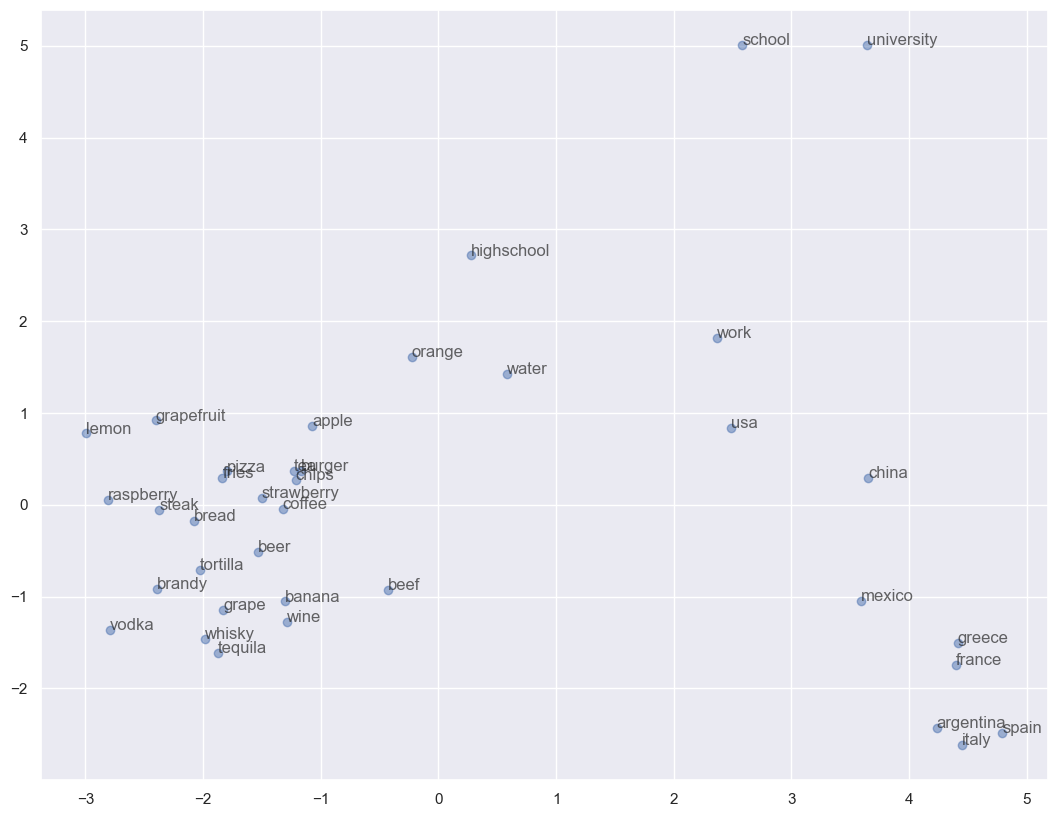

In [ ]:
#
plot_embeddings("embeddings_dict_200D.pkl", words, 2, embeddings_dict, "PCA")

**PCA Graph Commentaries**

As can be seen, the differentiation of the words is correct for country and school topics, but not correct for beverages and food, there is no adequate differentiation


The area highlighted in blue and yellow is where the differentiation problems are found.




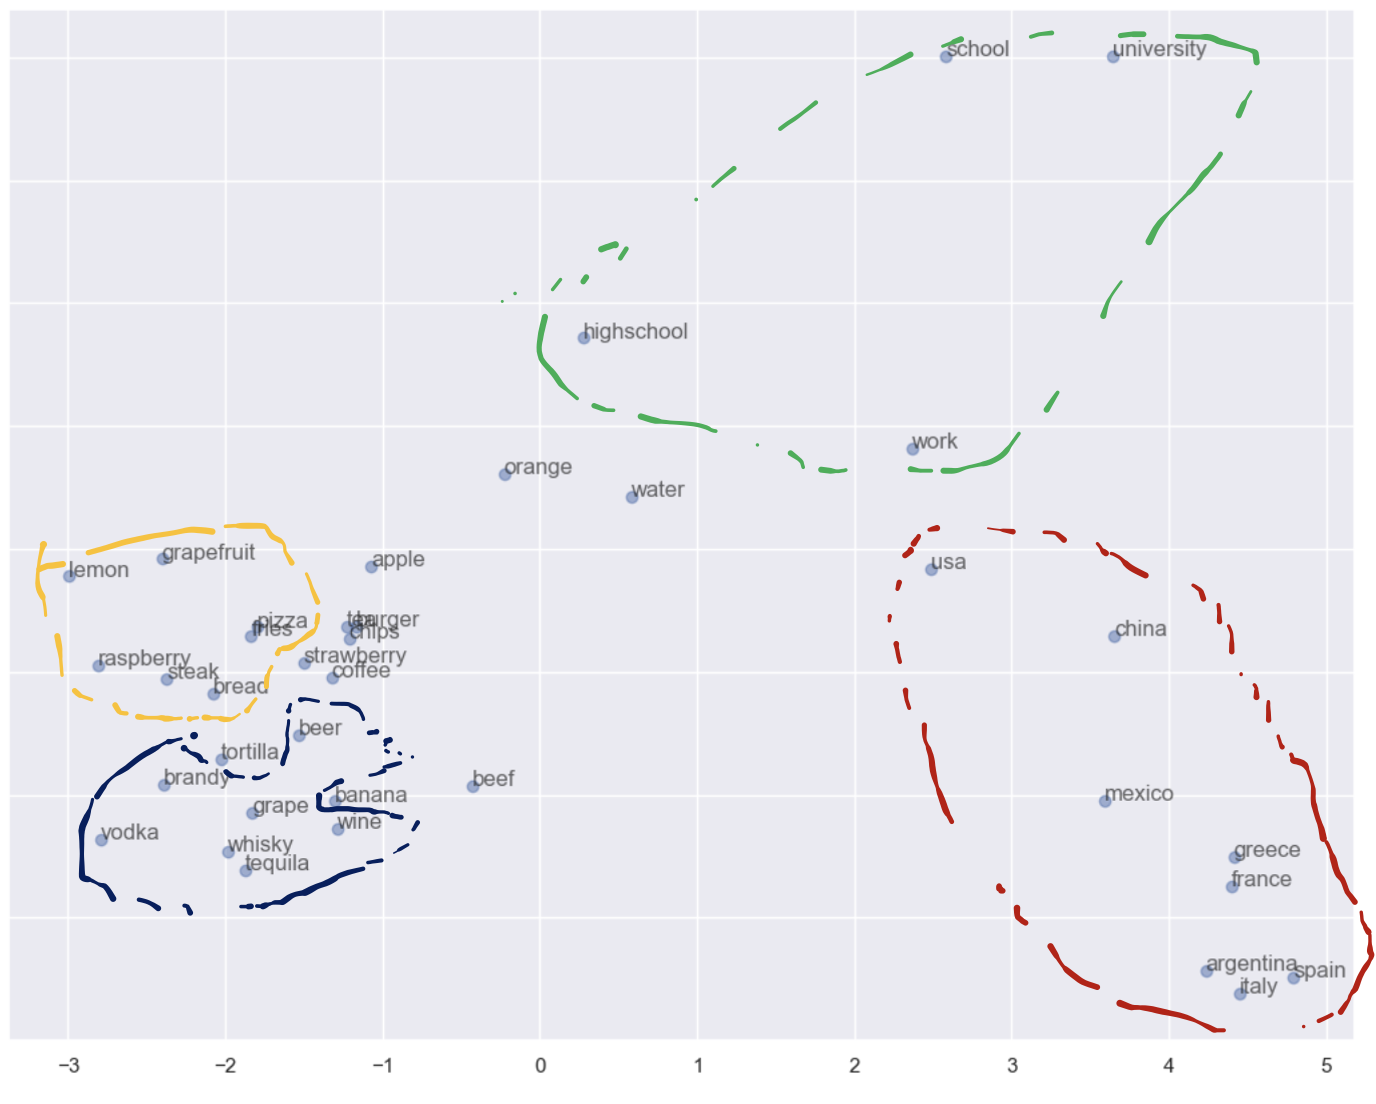



**Graph with TSNE**

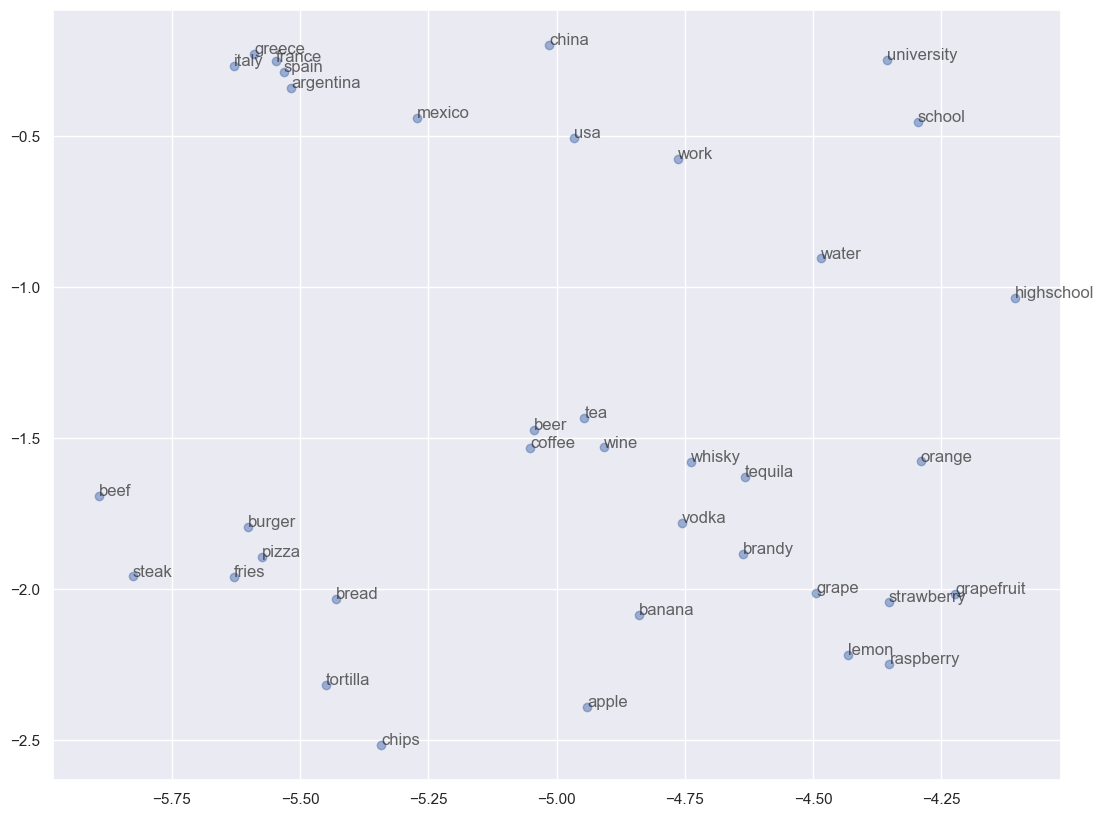

In [ ]:
# t-SNE dimensionality reduction for visualization
#mandamos llamar la misma funcion de graficar, pero ahora con TSNE
embeddings = plot_embeddings("embeddings_dict_200D.pkl", words, 2, embeddings_dict, "TSNE")

**Comments to TSNE Chart**

As can be seen, the differentiation of the words is correct and better than in the case of PCA, where the words are more distributed in the space of the graph, allowing a better differentiation between fruits and beverages, except for the word "water", which due to its wide context is not well differentiated in either of the two reductions.

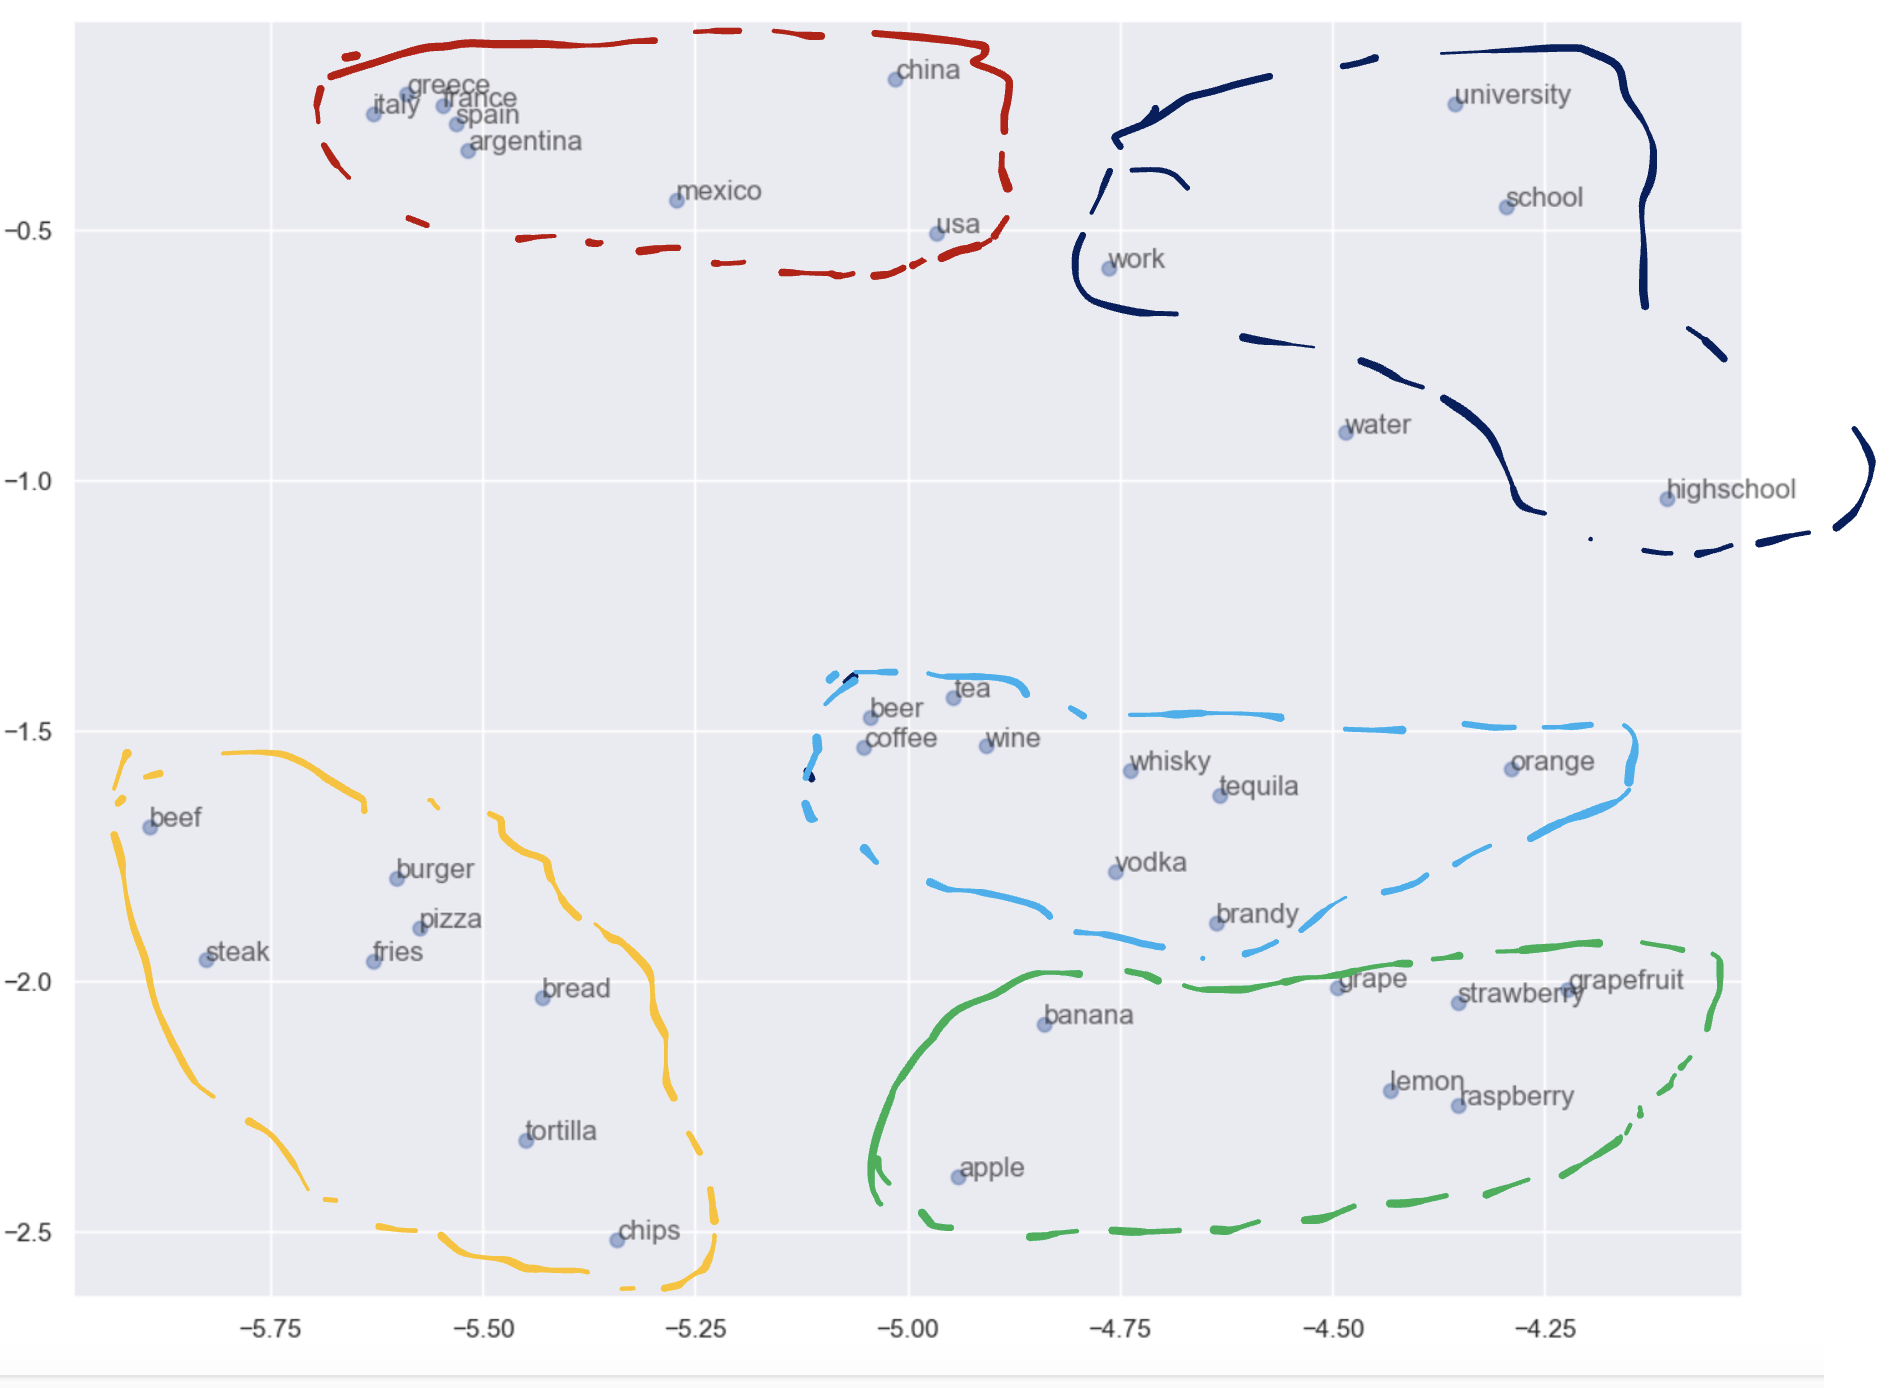

### **Let us compute analogies**

Analogy function, it creates the target vector by substracting the first 2 words and adding the third one, the minimum distance of a vector in the dictionary to this new vector would be the best analogy.

To calculate the minimum distance between a target vector and the subtraction of vectors is a way to perform word analogies in an embedding space. This is based on the concept that the direction in which the vector "man" must move to reach "woman" is the same direction in which the vector "king" must move to reach "queen."

**Comment**

As can be seen in the image, what we want is to find the relationships between the vectors of each word that allow us to see the analogy that exists between them.

This allows us to generate subtraction operations to the similarities that leave in essence different concepts of a word and then add another word that allows us to find the analogy.



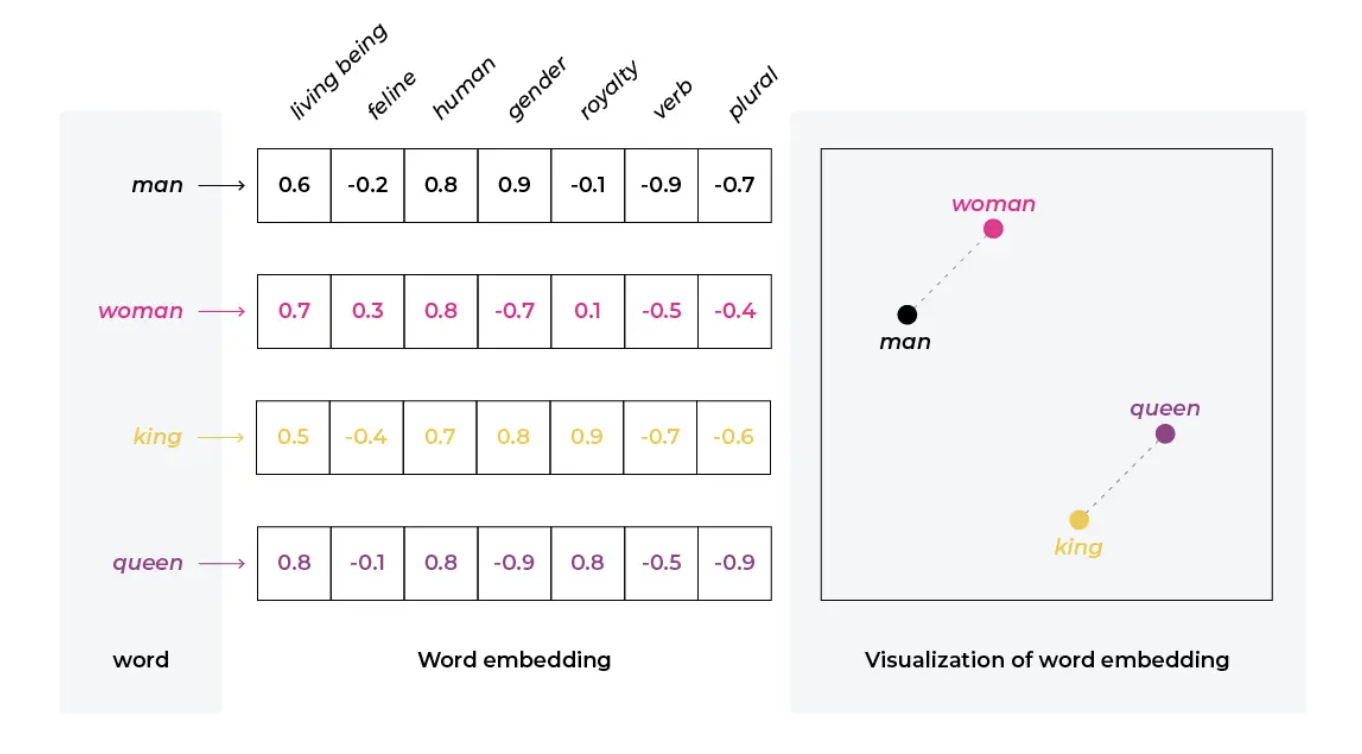



In [ ]:
# analogy
#funcion para obtener la analogia
def analogy(word1, word2, word3, embeddings_dict):
    word1, word2, word3 = word1.lower(), word2.lower(), word3.lower()

    # Obtain the embedding vectors for the words and convert them to NumPy vectors
    vec_a, vec_b, vec_c = np.array(embeddings_dict[word1]), np.array(embeddings_dict[word2]), np.array(embeddings_dict[word3])

    # Calculate the target vector as: vec_b - vec_a + vec_c
    vec_target = vec_b - vec_a + vec_c

    # Find the word most similar to the target vector
    min_dist = float("inf")  #create an initialized variable with infinite positive value
    best_word = None #create a variable initialized with "null".

    for word, vec in embeddings_dict.items():     #iterate the dictionary, word for the key and vec with the value of the vector
        if word not in [word1, word2, word3]:    #check if the word in the dictionary is NOT word 1, 2 or 3 to calculate the distance from that vector to the target
            dist = np.linalg.norm(vec - vec_target) #we keep our distance
            if dist < min_dist:                   #check if the distance is smaller than any distance we have
                min_dist = dist                   #if it is the smallest, we keep it.
                best_word = word                 #store the best word in best_word

    return best_word


**Test the analogy**

In [ ]:
analogy('boy', 'son', 'girl', embeddings_dict)  #we test with boy is to son as girl is to.... (let's hope she returns daughter: daughter)

'daughter'

**Now lets fing the most similar words**

cosine similarity is calculated using the formula for the dot product of two vectors divided by the product of their norms (lengths). Here is the formula for calculating cosine similarity between two vectors A and B:

Cosine Similarity = (A · B) / (||A|| * ||B||)

Where:

(A · B) represents the dot product of vectors A and B.
||A|| represents the norm (length) of vector A.
||B|| represents the norm (length) of vector B

In [ ]:
def find_most_similar(word, embeddings_dict, top_n=10):
    if word not in embeddings_dict:
        return []  # the word is not in the inlay dictionary

    # get the embedding vector of the input word
    word_vector = embeddings_dict[word]

  # Calculate the cosine similarity between the vector of the input word and all other vectors.
    similarities = {}
    for other_word, other_vector in embeddings_dict.items():        #we reiterate in the dictionary, other_word for the key and other_vector with the vector value
        if other_word != word:                                     #if the word is different from the word we want to find the similarity, then we calculate the distance
            similarity = np.dot(word_vector, other_vector) / (np.linalg.norm(word_vector) * np.linalg.norm(other_vector))
            similarities[other_word] = similarity

    #sort the words by cosine similarity and take the most similar "top_n" ones
    most_similar = sorted(similarities.items(), key=lambda x: x[1], reverse=True)[:top_n]

    return most_similar

In [ ]:
most_similar = find_most_similar('book', embeddings_dict)

In [ ]:
for i, w in enumerate(most_similar, 1):
    print(f'{i} ---> {w[0]}')

1 ---> books
2 ---> author
3 ---> novel
4 ---> published
5 ---> memoir
6 ---> wrote
7 ---> written
8 ---> essay
9 ---> biography
10 ---> autobiography


Extra activity
We check how the similarities would work using just the Euclidean Distance (similar on what we did for the analogy)
The results are not good. Cosine similarity generally works better for word embeddings because it takes into account the direction of vectors and not just the magnitude distance

In [ ]:
def find_most_similar_Bydist(word, embeddings_dict, top_n=10):
    if word not in embeddings_dict:
        return []  # the word is not in the inlay dictionary

   # get the embedding vector of the input word
    word_vector = embeddings_dict[word]

   # Calculate the cosine similarity between the vector of the input word and all other vectors.
    similarities = {}
    for other_word, other_vector in embeddings_dict.items():         #we reiterate in the dictionary, other_word for the key and other_vector with the vector value
        if other_word != word:                                     #if the word is different from the word we want to find the similarity, then we calculate the distance
            # Convert lists to NumPy vectors before calculating distance
            other_vector = np.array(other_vector)
            word_vector = np.array(word_vector)
            similarity = np.linalg.norm(other_vector - word_vector) # keep the distance
            similarities[other_word] = similarity

    # sorts words by cosine similarity and takes the most similar "top_n" words
    most_similar = sorted(similarities.items(), key=lambda x: x[1], reverse=True)[:top_n]

    return most_similar

In [ ]:
most_similarbyDist = find_most_similar_Bydist('book', embeddings_dict)

In [ ]:
 for i, w in enumerate(most_similarbyDist, 1):
    print(f'{i} ---> {w[0]}')

1 ---> republish
2 ---> non-families
3 ---> nonsubscribers
4 ---> nzse40
5 ---> 78.19
6 ---> eighteens
7 ---> 100-share
8 ---> reduced-price
9 ---> icasualties.org
10 ---> stoxx
